<a href="https://colab.research.google.com/github/Navele-12/FUTURE_DS_03/blob/main/College_Event_Feedback_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/student_feedback.csv")
print("Dataset loded successfully!")
print(df.head())

Dataset loded successfully!
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                  

In [ ]:
exclude=('Unnamed: 0', 'Student ID', 'StudentID', 'ID', 'id')

rating_cols=[c for c in df.select_dtypes (include=[np.number]).columns if c not in exclude]
rating_cols

['Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance']

In [ ]:
df[rating_cols]=df[rating_cols].fillna(df[rating_cols].mean())
for c in rating_cols:
    df[c]=df[c].clip(1,10)
df[rating_cols].describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


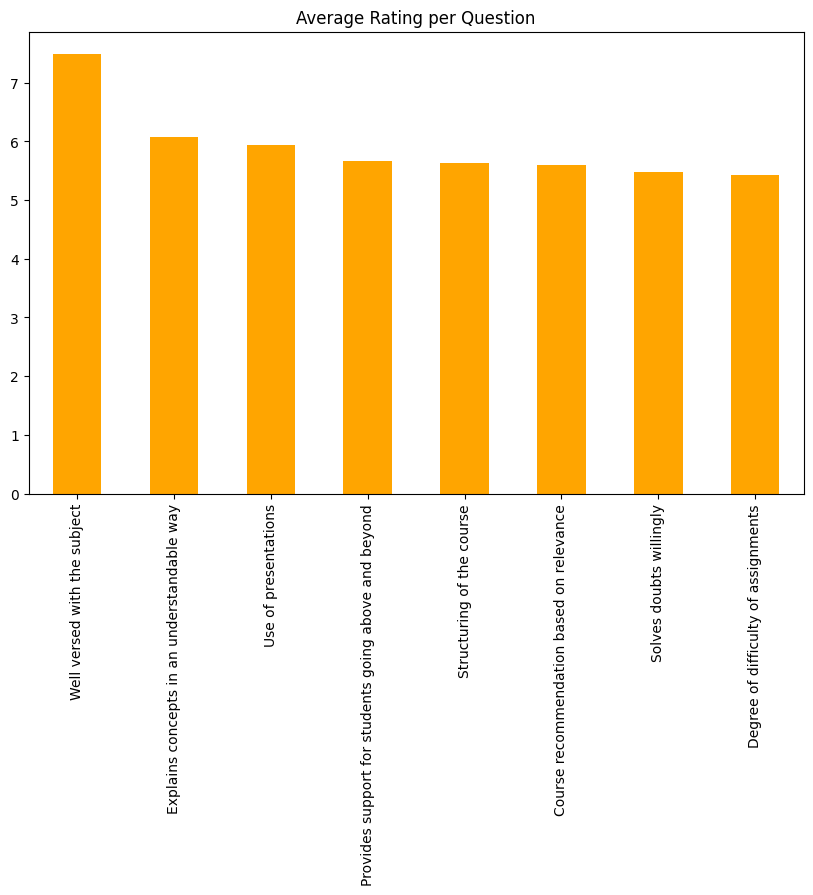

In [ ]:
avg=df[rating_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg.plot(kind='bar', color='orange')
plt.title("Average Rating per Question")
plt.show()

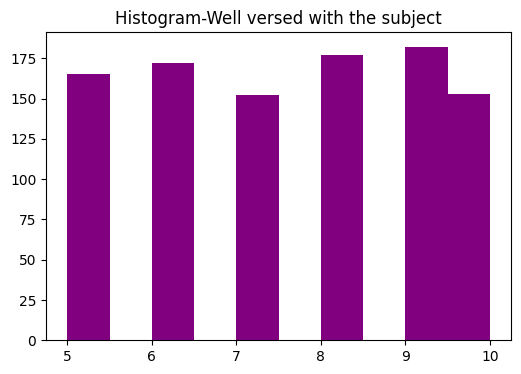

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df[rating_cols[0]], bins=10, color='purple')
plt.title(f"Histogram-{rating_cols[0]}")
plt.show()

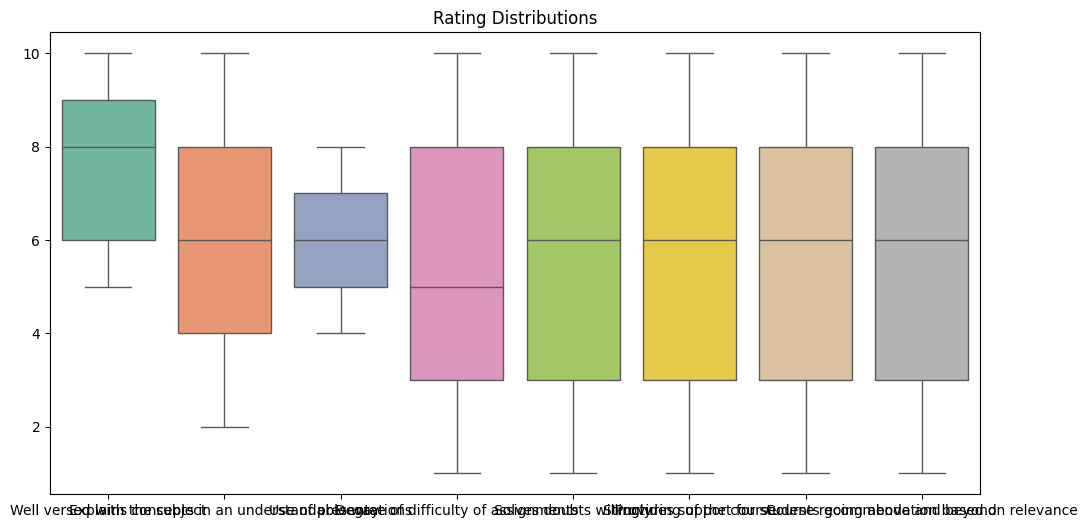

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[rating_cols], palette="Set2")
plt.title("Rating Distributions")
plt.show()

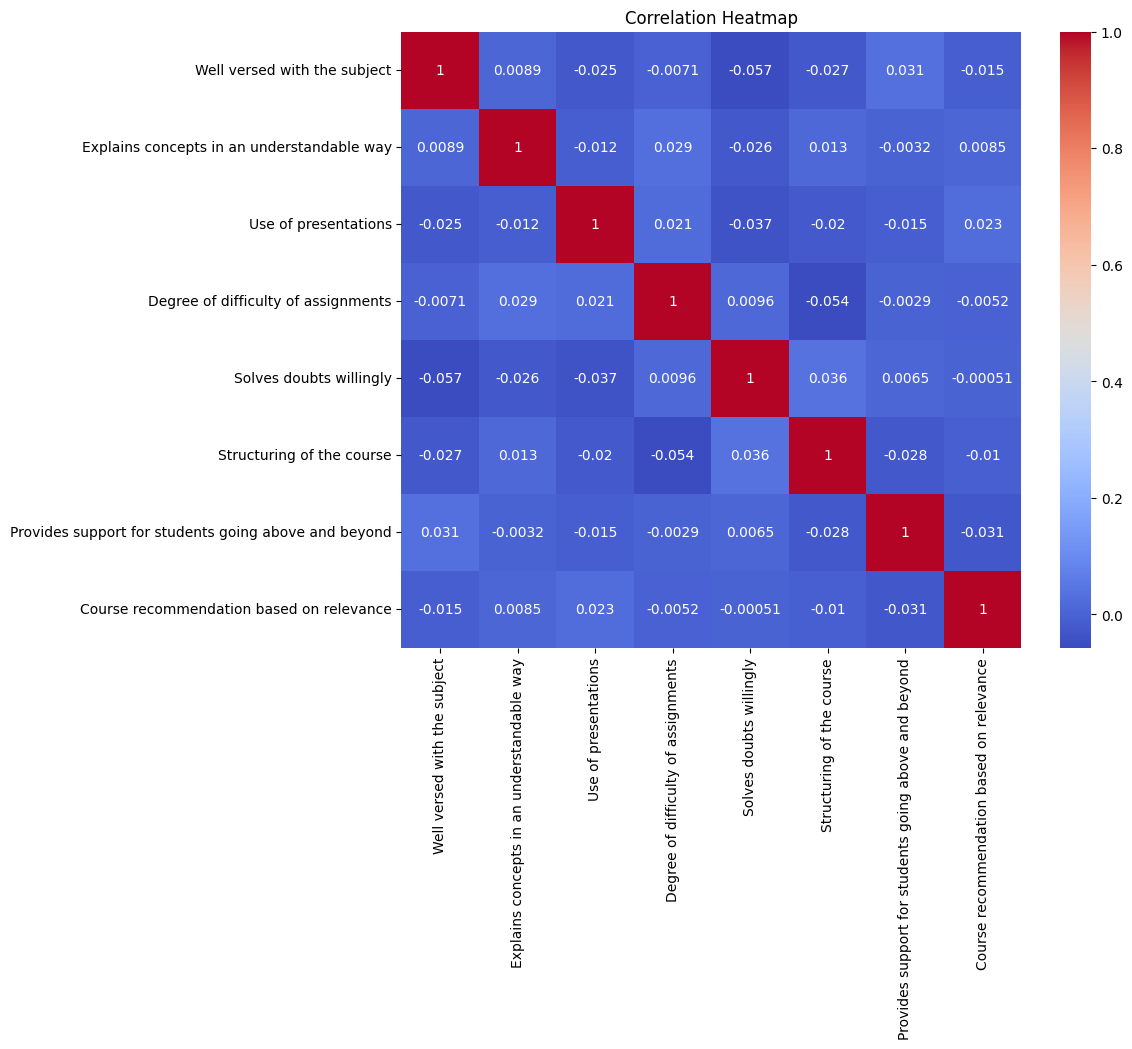

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()